In [1]:
# import Kmeans from sklearn
from sklearn.cluster import KMeans

# import numpy
import numpy as np

import pandas as pd

# import matplotlib
import matplotlib.pyplot as plt

#import MinMaxScaler for Normalization
from sklearn.preprocessing import MinMaxScaler

# PCA scatterplot
import plotly.express as px
from sklearn.decomposition import PCA

#for box and whisker plots
import seaborn as sns

# import data

In [2]:
# load geo data
nyc_geo_dataframe = pd.read_csv("nyc_data2.csv")

In [3]:
nyc_geo_dataframe.rename(columns= {'Median Sale Price - na has median':'house_price'}, inplace = True)

In [4]:
nyc_geo_dataframe.head()

,name,longitude,latitude,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price
0,Allerton,-73.859319,40.865788,860,1.50,28707,511.5,27.259983,312000
1,Annadale,-74.178549,40.538114,11,1.75,27073,263.7,45.011856,649500
2,Arden Heights,-74.185887,40.549286,10,1.70,25117,482.5,44.121985,578500
3,Arlington,-74.165104,40.635325,0,1.55,29715,482.5,38.728529,590000
4,Arrochar,-74.067124,40.596313,145,1.75,15659,317.3,48.440916,560000


In [35]:
nyc_geo_dataframe.describe()

,longitude,latitude,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,3.020000e+02
mean,-73.945370,40.701794,8627.738411,1.660596,41037.817881,482.539073,39.916554,6.672672e+05
std,0.120893,0.097543,21929.739104,0.175360,28266.396667,332.476092,10.083204,4.543206e+05
min,-74.246569,40.505334,0.000000,1.150000,0.000000,128.100000,11.450911,5.000000e+04
25%,-73.998705,40.619182,0.000000,1.550000,23926.000000,288.750000,33.000982,4.981248e+05
50%,-73.931460,40.702969,920.000000,1.650000,32887.500000,482.500000,40.922400,5.900000e+05
75%,-73.857525,40.767796,3673.250000,1.800000,52225.750000,482.500000,45.712733,7.383750e+05
max,-73.708847,40.908543,201832.000000,2.050000,159351.000000,3527.500000,81.326022,5.504250e+06


In [5]:
#will we just cluster on this or take out a few things, like maybe longitude and latitude?

In [6]:
#leaves out longitude and latitude
nyc_geo_dataframe_features_only = nyc_geo_dataframe[['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score','house_price']]

# Optional: Normalize Data

In [7]:
#normalize
scaler = MinMaxScaler()
normalized_df1 = scaler.fit_transform(nyc_geo_dataframe_features_only)
#normalized_df1


In [8]:
#make interpretable df
normalized_df2 = pd.DataFrame(data=normalized_df1, columns=['uber_count','avg_price','adj_pop','median_daily_test_rate','avg_test_score','house_price'])
normalized_df2

,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price
0,0.004261,0.388889,0.180149,0.112785,0.226248,0.048036
1,0.000055,0.666667,0.169895,0.039889,0.480299,0.109914
2,0.000050,0.611111,0.157621,0.104254,0.467564,0.096897
3,0.000000,0.444444,0.186475,0.104254,0.390377,0.099005
4,0.000718,0.666667,0.098267,0.055657,0.529373,0.093505
...,...,...,...,...,...,...
297,0.010197,0.277778,0.347729,0.027681,0.418960,0.097172
298,0.004013,0.277778,0.270058,0.038830,0.493530,0.026585
299,0.000025,0.666667,0.124436,0.049832,0.469729,0.136591
300,0.022628,0.277778,0.279088,0.034065,0.508237,0.058853


# Elbow Plot

In [9]:
def plot_distortion(X,max_clusters = 30):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(X)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

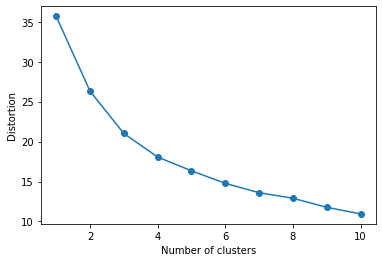

In [10]:
# elbow rule graph
plot_distortion(normalized_df2,max_clusters=10)

In [11]:
#decide on number of clusters, input below

# Create clustering model with K-Means

In [36]:
km = KMeans(n_clusters=4, # how many clusters we expected 
            n_init=10) # how many initial runs

In [37]:
# y Axis for K-Means

y_km = km.fit_predict(normalized_df2)

In [38]:
y_km

array([0, 3, 3, 0, 3, 3, 1, 0, 3, 0, 3, 3, 3, 0, 3, 0, 0, 3, 3, 0, 3, 0,
       3, 2, 3, 3, 0, 3, 2, 3, 0, 3, 0, 0, 0, 3, 0, 0, 0, 2, 3, 0, 2, 3,
       3, 0, 3, 2, 3, 1, 0, 3, 0, 1, 0, 0, 3, 1, 3, 2, 3, 3, 3, 2, 0, 0,
       0, 0, 2, 0, 3, 3, 3, 0, 3, 3, 0, 0, 2, 2, 0, 1, 3, 0, 0, 0, 3, 3,
       0, 2, 3, 3, 3, 0, 3, 1, 2, 3, 3, 0, 2, 2, 3, 3, 3, 3, 0, 3, 3, 3,
       0, 3, 0, 3, 3, 0, 3, 3, 0, 3, 3, 3, 1, 0, 0, 3, 3, 0, 0, 0, 0, 0,
       0, 3, 0, 1, 3, 3, 0, 0, 2, 0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 1, 3, 1,
       3, 0, 3, 3, 0, 2, 0, 3, 3, 3, 3, 3, 2, 0, 3, 0, 2, 0, 0, 3, 1, 3,
       0, 3, 2, 3, 0, 0, 0, 2, 0, 0, 1, 3, 3, 3, 3, 0, 3, 3, 0, 0, 0, 0,
       3, 3, 0, 0, 3, 0, 0, 3, 3, 1, 0, 3, 3, 0, 3, 0, 0, 0, 0, 3, 3, 3,
       3, 0, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 2, 3, 0, 0, 3,
       3, 3, 3, 0, 3, 3, 3, 1, 3, 2, 3, 0, 2, 3, 0, 3, 0, 3, 3, 0, 3, 3,
       2, 3, 2, 3, 3, 3, 0, 3, 0, 1, 3, 1, 0, 0, 1, 1, 0, 0, 3, 0, 2, 0,
       0, 0, 1, 0, 0, 3, 0, 1, 0, 3, 3, 0, 0, 3, 0,

# Make cluster series for merging

In [39]:
y_km_series_for_merging = pd.Series(data=y_km, name='clusters_K_Means')

In [40]:
y_km_series_for_merging

0      0
1      3
2      3
3      0
4      3
      ..
297    0
298    0
299    3
300    0
301    1
Name: clusters_K_Means, Length: 302, dtype: int32

# Merge Clusters on to Orig Dataframe

In [41]:
#this merge is on to the orig, unnormalized data
#use: box and whisker plots

orig_merged_df = nyc_geo_dataframe_features_only.merge(y_km_series_for_merging, how='inner', left_index = True, right_index = True)

In [42]:
#this merge is on the normalized data
#use: PCA, Heatmap

normalized_merged_df_1 = normalized_df2.merge(y_km_series_for_merging, how='inner', left_index = True, right_index = True)

In [43]:
normalized_merged_df_1.head()

,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price,clusters_K_Means
0,0.004261,0.388889,0.180149,0.112785,0.226248,0.048036,0
1,0.000055,0.666667,0.169895,0.039889,0.480299,0.109914,3
2,0.000050,0.611111,0.157621,0.104254,0.467564,0.096897,3
3,0.000000,0.444444,0.186475,0.104254,0.390377,0.099005,0
4,0.000718,0.666667,0.098267,0.055657,0.529373,0.093505,3


In [44]:
normalized_merged_df_1.describe()

,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price,clusters_K_Means
count,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,0.042747,0.567329,0.257531,0.104265,0.407379,0.113172,1.599338
std,0.108653,0.194844,0.177384,0.097804,0.144303,0.083297,1.388754
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.444444,0.150147,0.047258,0.308408,0.082161,0.000000
50%,0.004558,0.555556,0.206384,0.104254,0.421774,0.099005,2.000000
75%,0.018200,0.722222,0.327740,0.104254,0.490329,0.126209,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


# PCA scatterplot for this clustering

In [46]:
n_components = 2 

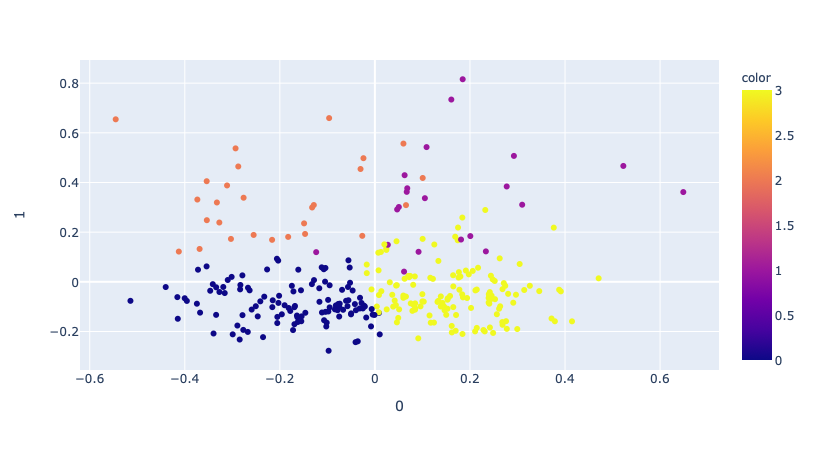

In [47]:
pca = PCA(n_components = n_components)
components = pca.fit_transform(normalized_df2)
# Plotting the PCA scatter plot for different classes

fig = px.scatter(components, x=0, y=1, color=normalized_merged_df_1['clusters_K_Means']) #check if column name is correct
fig.show()

# Explore clusters with box polts

['uber_count','avg_price','median_daily_test_rate','avg_test_score']

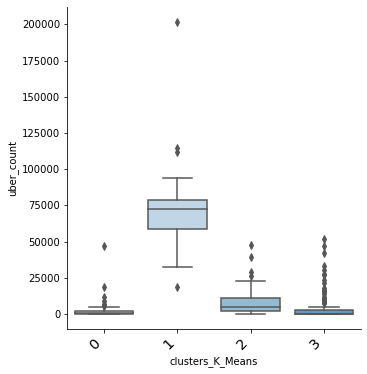

In [48]:
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "uber_count", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

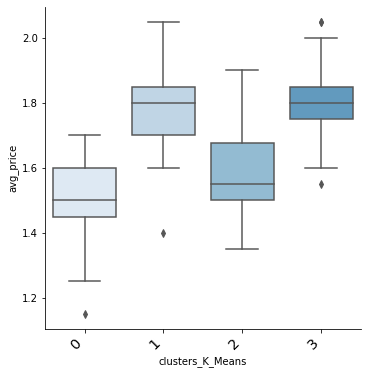

In [49]:
#avg_price
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "avg_price", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

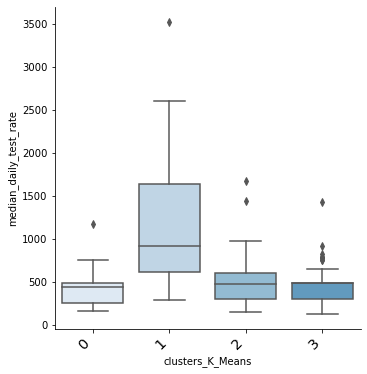

In [50]:
#median_daily_test_rate
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "median_daily_test_rate", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

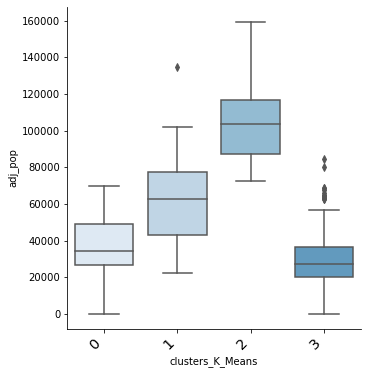

In [51]:
#median_daily_test_rate
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "adj_pop", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

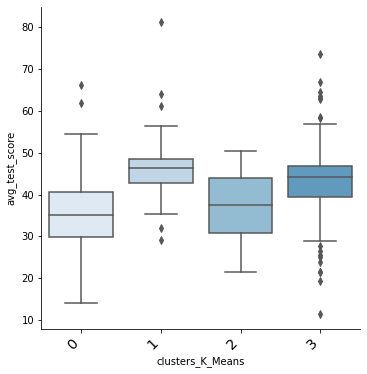

In [52]:
#median_daily_test_rate
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "avg_test_score", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

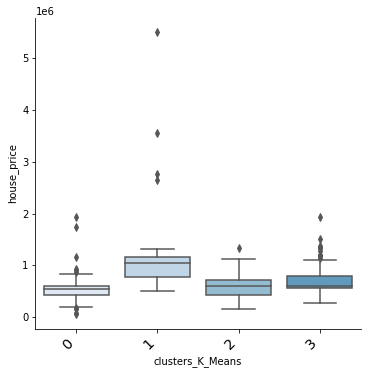

In [53]:
#median_daily_test_rate
sns.set_palette("Blues")
sns.catplot(x = 'clusters_K_Means', y= "house_price", kind="box", data= orig_merged_df)

#the below formula makes it all easier to read
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-large'  
)

plt.show()

In [34]:
orig_merged_df.describe()

,uber_count,avg_price,adj_pop,median_daily_test_rate,avg_test_score,house_price,clusters_K_Means
count,302.000000,302.000000,302.000000,302.000000,302.000000,3.020000e+02,302.00000
mean,8627.738411,1.660596,41037.817881,482.539073,39.916554,6.672672e+05,0.65894
std,21929.739104,0.175360,28266.396667,332.476092,10.083204,4.543206e+05,0.68168
min,0.000000,1.150000,0.000000,128.100000,11.450911,5.000000e+04,0.00000
25%,0.000000,1.550000,23926.000000,288.750000,33.000982,4.981248e+05,0.00000
50%,920.000000,1.650000,32887.500000,482.500000,40.922400,5.900000e+05,1.00000
75%,3673.250000,1.800000,52225.750000,482.500000,45.712733,7.383750e+05,1.00000
max,201832.000000,2.050000,159351.000000,3527.500000,81.326022,5.504250e+06,2.00000


# Explore Feature Correlation with Heat Map

In [28]:
# compute correlations between features
df_corr = normalized_merged_df_1.corr()


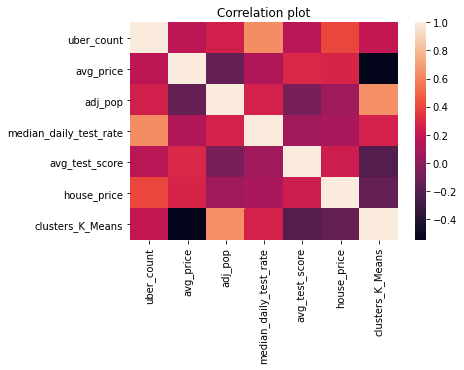

In [29]:
# plot the correlations
sns.heatmap(df_corr)
plt.title('Correlation plot')
plt.show()

# Radar Plot